In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
data = pd.read_csv('hh101_windows_data.csv')
data.fillna(0, inplace=True)
data.head()


,toilet_mean_occ_time,toilet_std_occ_time,toilet_mean_duration,toilet_std_duration,toilet_nb_occ,relax_mean_occ_time,relax_std_occ_time,relax_mean_duration,relax_std_duration,relax_nb_occ,...,groom_std_occ_time,groom_mean_duration,groom_std_duration,groom_nb_occ,entertain_guests_mean_occ_time,entertain_guests_std_occ_time,entertain_guests_mean_duration,entertain_guests_std_duration,entertain_guests_nb_occ,nb_label
0,50191.977190,16674.044000,1.933142,0.815900,30,48486.197074,5182.966512,8.160318,7.544386,4,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,25
1,49131.650598,15714.164049,2.000988,0.791564,28,0.000000,0.000000,0.000000,0.000000,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,24
2,47495.007266,14815.874658,2.089348,1.027320,29,0.000000,0.000000,0.000000,0.000000,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,22
3,47314.569160,14334.778406,2.032924,1.024109,30,49606.558431,0.000000,1.492964,0.000000,1,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,21
4,49288.778211,14952.737270,1.908042,1.061821,27,49606.558431,0.000000,1.492964,0.000000,1,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,20


# Data Exploration


In [6]:
features = data
# Standardizing the features
features_norm = StandardScaler().fit_transform(features)

features_names = data.columns
features_names

data_norm = pd.DataFrame(features_norm, columns=features_names)
data_norm.head()

,toilet_mean_occ_time,toilet_std_occ_time,toilet_mean_duration,toilet_std_duration,toilet_nb_occ,relax_mean_occ_time,relax_std_occ_time,relax_mean_duration,relax_std_duration,relax_nb_occ,...,groom_std_occ_time,groom_mean_duration,groom_std_duration,groom_nb_occ,entertain_guests_mean_occ_time,entertain_guests_std_occ_time,entertain_guests_mean_duration,entertain_guests_std_duration,entertain_guests_nb_occ,nb_label
0,1.257638,-0.522077,-0.745288,-1.186231,0.074576,0.583278,-0.437473,-0.974075,-0.390096,-0.486776,...,-0.899445,-0.695632,-0.408563,-0.96022,-0.412176,-0.346309,-0.369939,-0.313376,-0.371391,0.473013
1,0.919938,-0.984516,-0.613559,-1.293786,-0.282093,-3.694820,-1.398645,-1.884875,-1.064208,-1.215285,...,-0.899445,-0.695632,-0.408563,-0.96022,-0.412176,-0.346309,-0.369939,-0.313376,-0.371391,0.039418
2,0.398689,-1.417283,-0.442003,-0.251841,-0.103758,-3.694820,-1.398645,-1.884875,-1.064208,-1.215285,...,-0.899445,-0.695632,-0.408563,-0.96022,-0.412176,-0.346309,-0.369939,-0.313376,-0.371391,-0.827773
3,0.341222,-1.649060,-0.551553,-0.266032,0.074576,0.682132,-1.398645,-1.718240,-1.064208,-1.033158,...,-0.899445,-0.695632,-0.408563,-0.96022,-0.412176,-0.346309,-0.369939,-0.313376,-0.371391,-1.261368
4,0.969981,-1.351347,-0.794022,-0.099360,-0.460428,0.682132,-1.398645,-1.718240,-1.064208,-1.033158,...,-0.899445,-0.695632,-0.408563,-0.96022,-0.412176,-0.346309,-0.369939,-0.313376,-0.371391,-1.694964


<IPython.core.display.Javascript object>


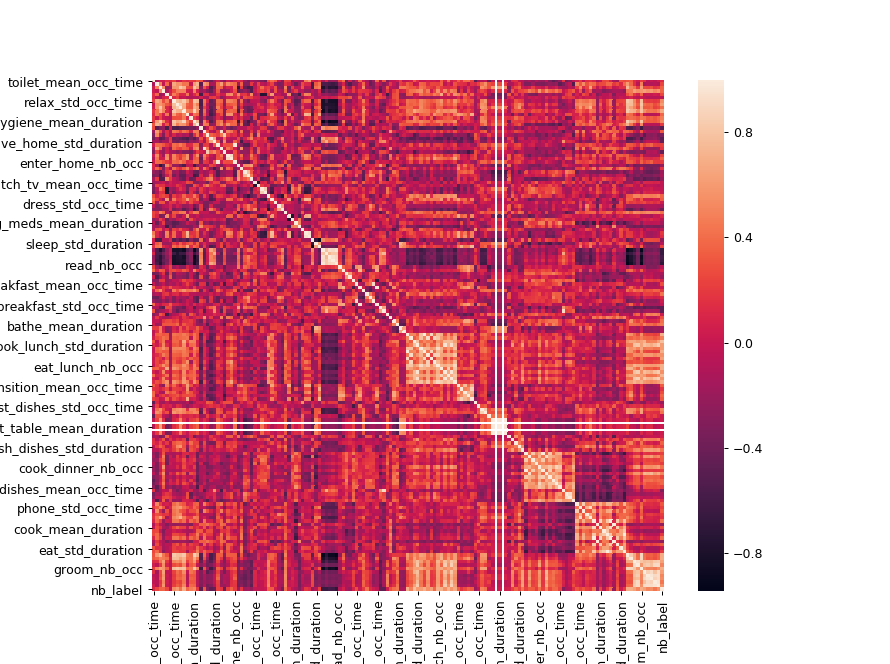

In [7]:
cor = data_norm.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

## Affinity Clustering

In [5]:
model = AffinityPropagation(damping = 0.8, max_iter = 400, affinity = 'euclidean')
model.fit(features_norm)
clust_labels2 = model.predict(features_norm)
cent2 = model.cluster_centers_
(clust_labels2, cent2)

(array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,
         4,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,
         7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9, 10, 10,
        10, 11, 11, 11], dtype=int64),
 array([[ 0.91993832, -0.98451611, -0.61355884, ..., -0.31337605,
         -0.37139068,  0.03941776],
        [ 0.84407492, -1.51485545, -0.82512271, ..., -0.31337605,
         -0.37139068, -1.26136844],
        [-0.13063916,  0.32175383, -0.58638693, ..., -0.31337605,
         -0.37139068, -0.39417764],
        ..., 
        [ 0.36267997,  0.34184182,  0.21142821, ...,  3.761413  ,
          3.71390676,  1.77379937],
        [-0.22170542,  1.19808912,  2.27099605, ..., -0.31337605,
         -0.37139068, -0.39417764],
        [ 0.53847256,  1.35624645,  1.72239828, ..., -0.31337605,
         -0.37139068,  0.47301317]]))

In [6]:
data['cluster'] = clust_labels2

# Principal Component Analysis

In [7]:
## Application of PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(features_norm)

In [8]:
principalDf = pd.DataFrame(data = principalComponents, columns=['PC1', 'PC2', 'PC3'])

principalDf['cluster'] = clust_labels2
# principalDf = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':principalDf.columns})

# sns.barplot(x='PC',y="var", 
#            data=principalDf, color="c");

principalDf.head()

,PC1,PC2,PC3,cluster
0,-0.874599,-1.007218,-3.069374,0
1,-1.396607,-1.165020,-2.983350,0
2,-4.501887,-1.177200,-2.725844,0
3,-6.446618,-3.207628,-2.189375,1
4,-8.374288,-3.351640,-0.579458,1


<IPython.core.display.Javascript object>


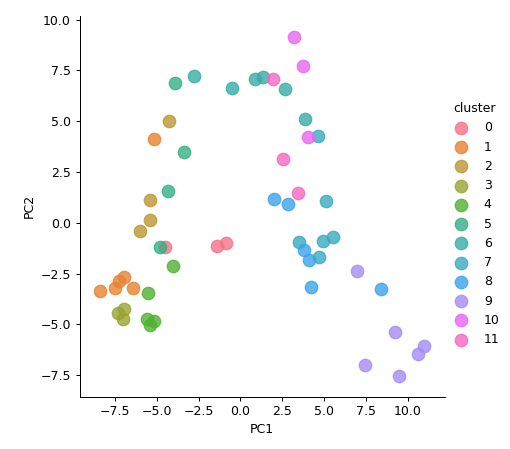

In [9]:
# ## Vizualisation
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)

# # ax.scatter(principalDf['pc1'], principalDf['pc2'], s = 200)

sns.lmplot( x="PC1", y="PC2",
  data=principalDf, 
  fit_reg=False, 
  hue='cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 100}) # specify the point size


# for label, x, y in zip(principalDf.index, principalDf['pc1'].values, principalDf['pc2'].values):
#     plt.annotate(
#         label,
#         xy=(x, y), xytext=(-10, 10),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# ax.grid()




<IPython.core.display.Javascript object>


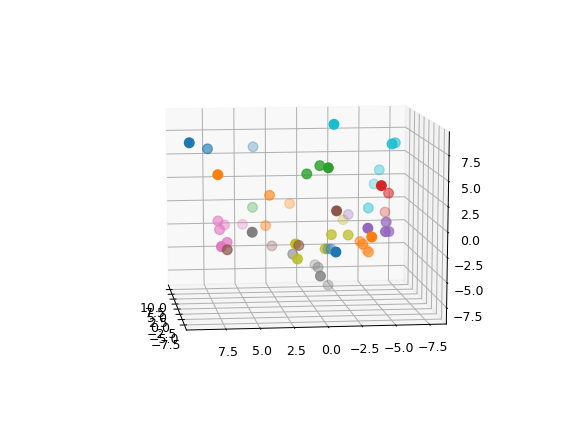

In [10]:
plt.figure()
ax = plt.axes(projection='3d')

for cluster in set(clust_labels2):
    df = principalDf[principalDf.cluster == cluster]
    ax.scatter(df['PC1'], df['PC2'], df['PC3'], s=60)


In [11]:
print('Explained variance = {}'.format(np.sum(pca.explained_variance_ratio_)))

pca.explained_variance_ratio_

Explained variance = 0.43277762325346225


array([ 0.20317249,  0.13048482,  0.09912031])